# **Obesity Clustering Analysis**
### The dataset is taken from UCI Machine Learning library and its description can be found here https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/ObesityDataSet_Description.arff 
### The dataset is also stored at github.

### In this analysis, I'm finding the obesity level of people with most significant features.

**Installing the Libraries**

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [ ]:
# importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/Obesity.csv')

#Printing first 5 rows
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FC_HighCalorie,FC_Vegetables,N_Meals,SMOKE,Water_Qty,Calorie_Calc,Physical_Activity,Gadgets_Usage,C_Alcohol,Transport_mode,Obese_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,no,2.0,no,0.0,1.0,no,Personal,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,yes,3.0,yes,3.0,0.0,yes,Personal,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,no,2.0,no,2.0,1.0,yes,Personal,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,no,2.0,no,2.0,0.0,yes,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,no,2.0,no,0.0,0.0,yes,Personal,Overweight_Level_II


In [ ]:
#Changing columns into binary
def mk_binary(col):
  col[col=='yes']=1
  col[col=='no']=0

# data.Gender[data.family_history_with_overweight== 'yes'] = 1
data1 = data.copy(deep=True)
mk_binary(data1.family_history_with_overweight)
mk_binary(data1.FC_HighCalorie)
mk_binary(data1.SMOKE)
mk_binary(data1.Calorie_Calc)
mk_binary(data1.C_Alcohol)
data1.Transport_mode[data1.Transport_mode=='Personal']=1
data1.Transport_mode[data1.Transport_mode=='Walking']=0
data1.Gender[data1.Gender=='Male']=1
data1.Gender[data1.Gender=='Female']=0
data1['family_history_with_overweight'] = data1['family_history_with_overweight'].astype(float, errors = 'raise')
data1['FC_HighCalorie'] = data1['FC_HighCalorie'].astype(float, errors = 'raise')
data1['SMOKE'] = data1['SMOKE'].astype(float, errors = 'raise')
data1['Calorie_Calc'] = data1['Calorie_Calc'].astype(float, errors = 'raise')
data1['C_Alcohol'] = data1['C_Alcohol'].astype(float, errors = 'raise')
data1['Transport_mode'] = data1['Transport_mode'].astype(float, errors = 'raise')
data1['Gender'] = data1['Gender'].astype(float, errors = 'raise')
data1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FC_HighCalorie,FC_Vegetables,N_Meals,SMOKE,Water_Qty,Calorie_Calc,Physical_Activity,Gadgets_Usage,C_Alcohol,Transport_mode,Obese_level
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,Normal_Weight
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,Normal_Weight
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,Normal_Weight
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,Overweight_Level_I
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,Overweight_Level_II


In [ ]:
# describing the data
data1.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FC_HighCalorie,FC_Vegetables,N_Meals,SMOKE,Water_Qty,Calorie_Calc,Physical_Activity,Gadgets_Usage,C_Alcohol,Transport_mode
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,0.020843,2.008011,0.045476,1.010298,0.657866,0.697300,0.973472
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.142893,0.612953,0.208395,0.850592,0.608927,0.459535,0.160737
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,1.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,1.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000,1.000000,1.000000


In [ ]:
# checking if there is any NULL data
data1.isnull().any().any()

False

# **Data Visualization**

## **Correlation matrix (heatmap style)**
To explore the dataset in depth, we will try to visualize the data in a more meaningful manner:

1.   Correation matrix (heatmap style)
2.   Correlation matrix (zoomed heatmap style).
3.   Scatter plots between the most correlated variables (move like Jagger style).


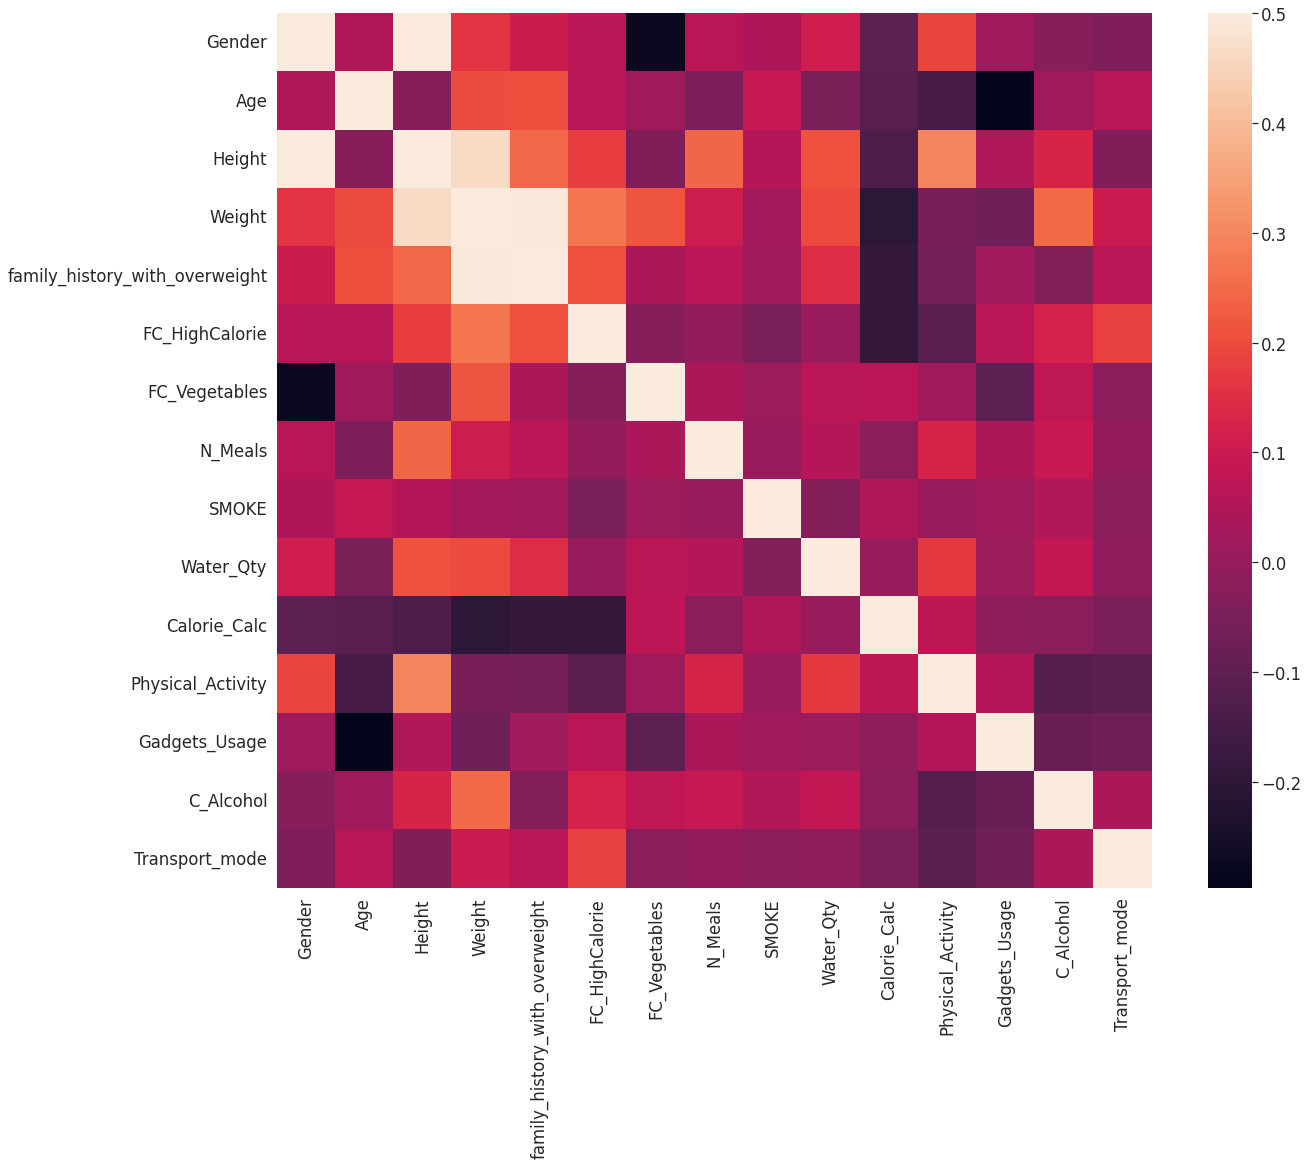

In [ ]:
# Create a heatmap to display correlations between each variable
# Graphical representation of data where the individual values contained in a matrix are represented as colors.

corrmat = data1.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat, vmax=.5, square=True);

['Weight' 'family_history_with_overweight' 'Height' 'FC_HighCalorie'
 'C_Alcohol' 'FC_Vegetables' 'Age' 'Water_Qty' 'Gender' 'N_Meals'
 'Transport_mode' 'SMOKE' 'Physical_Activity' 'Gadgets_Usage'
 'Calorie_Calc']


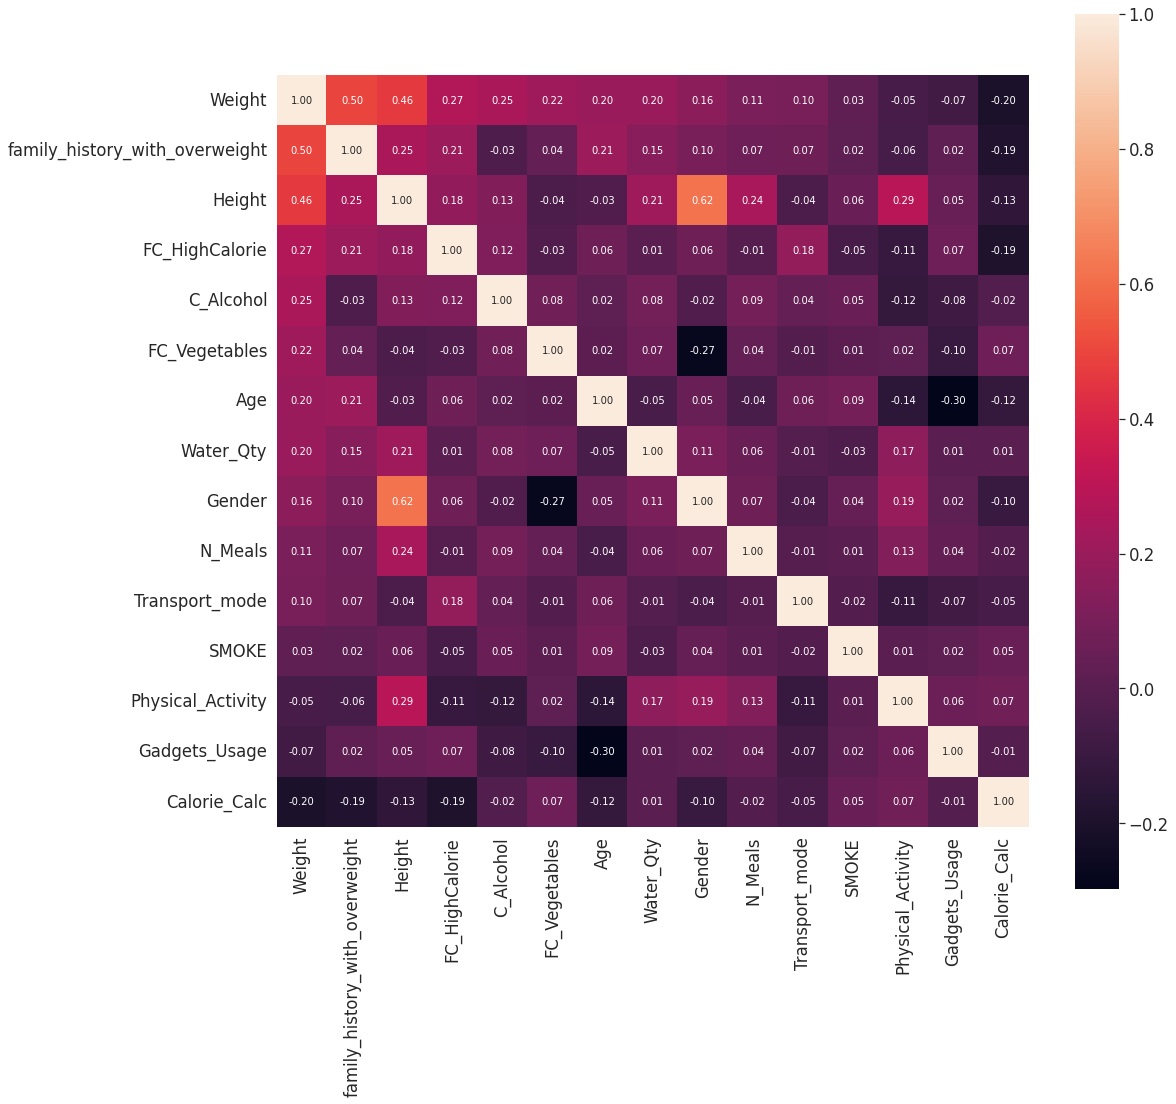

In [ ]:
#obesity correlation matrix
k = 15 #number of variables for heatmap
imp_cols = corrmat.nlargest(k,'Weight')['Weight'].index
print(imp_cols.values)
cm = np.corrcoef(data1[imp_cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=imp_cols.values, xticklabels=imp_cols.values)
plt.show()




> From Correlation matrix with respect to weight, I found that weight has a relationship with family_history_with_over_weight, Height, Frequent Consumption of High Calories Food, Consumption of Alcohol, Age and Water quantity.







## **Checking Gender Count**
It turns out that Obesity is not influenced by gender

[0. 1.]


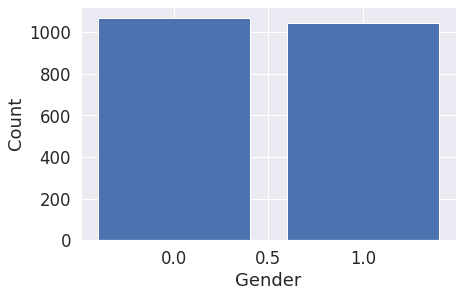

In [ ]:
# visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
x = data1.Gender.unique() 
print(x) 
# Counting 'Males' and 'Females' in the dataset  
y = data1.Gender.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')  
plt.show()  

## Using pairplot to visualize given data to find the relationship between them where the variables can be continuous or categorical.

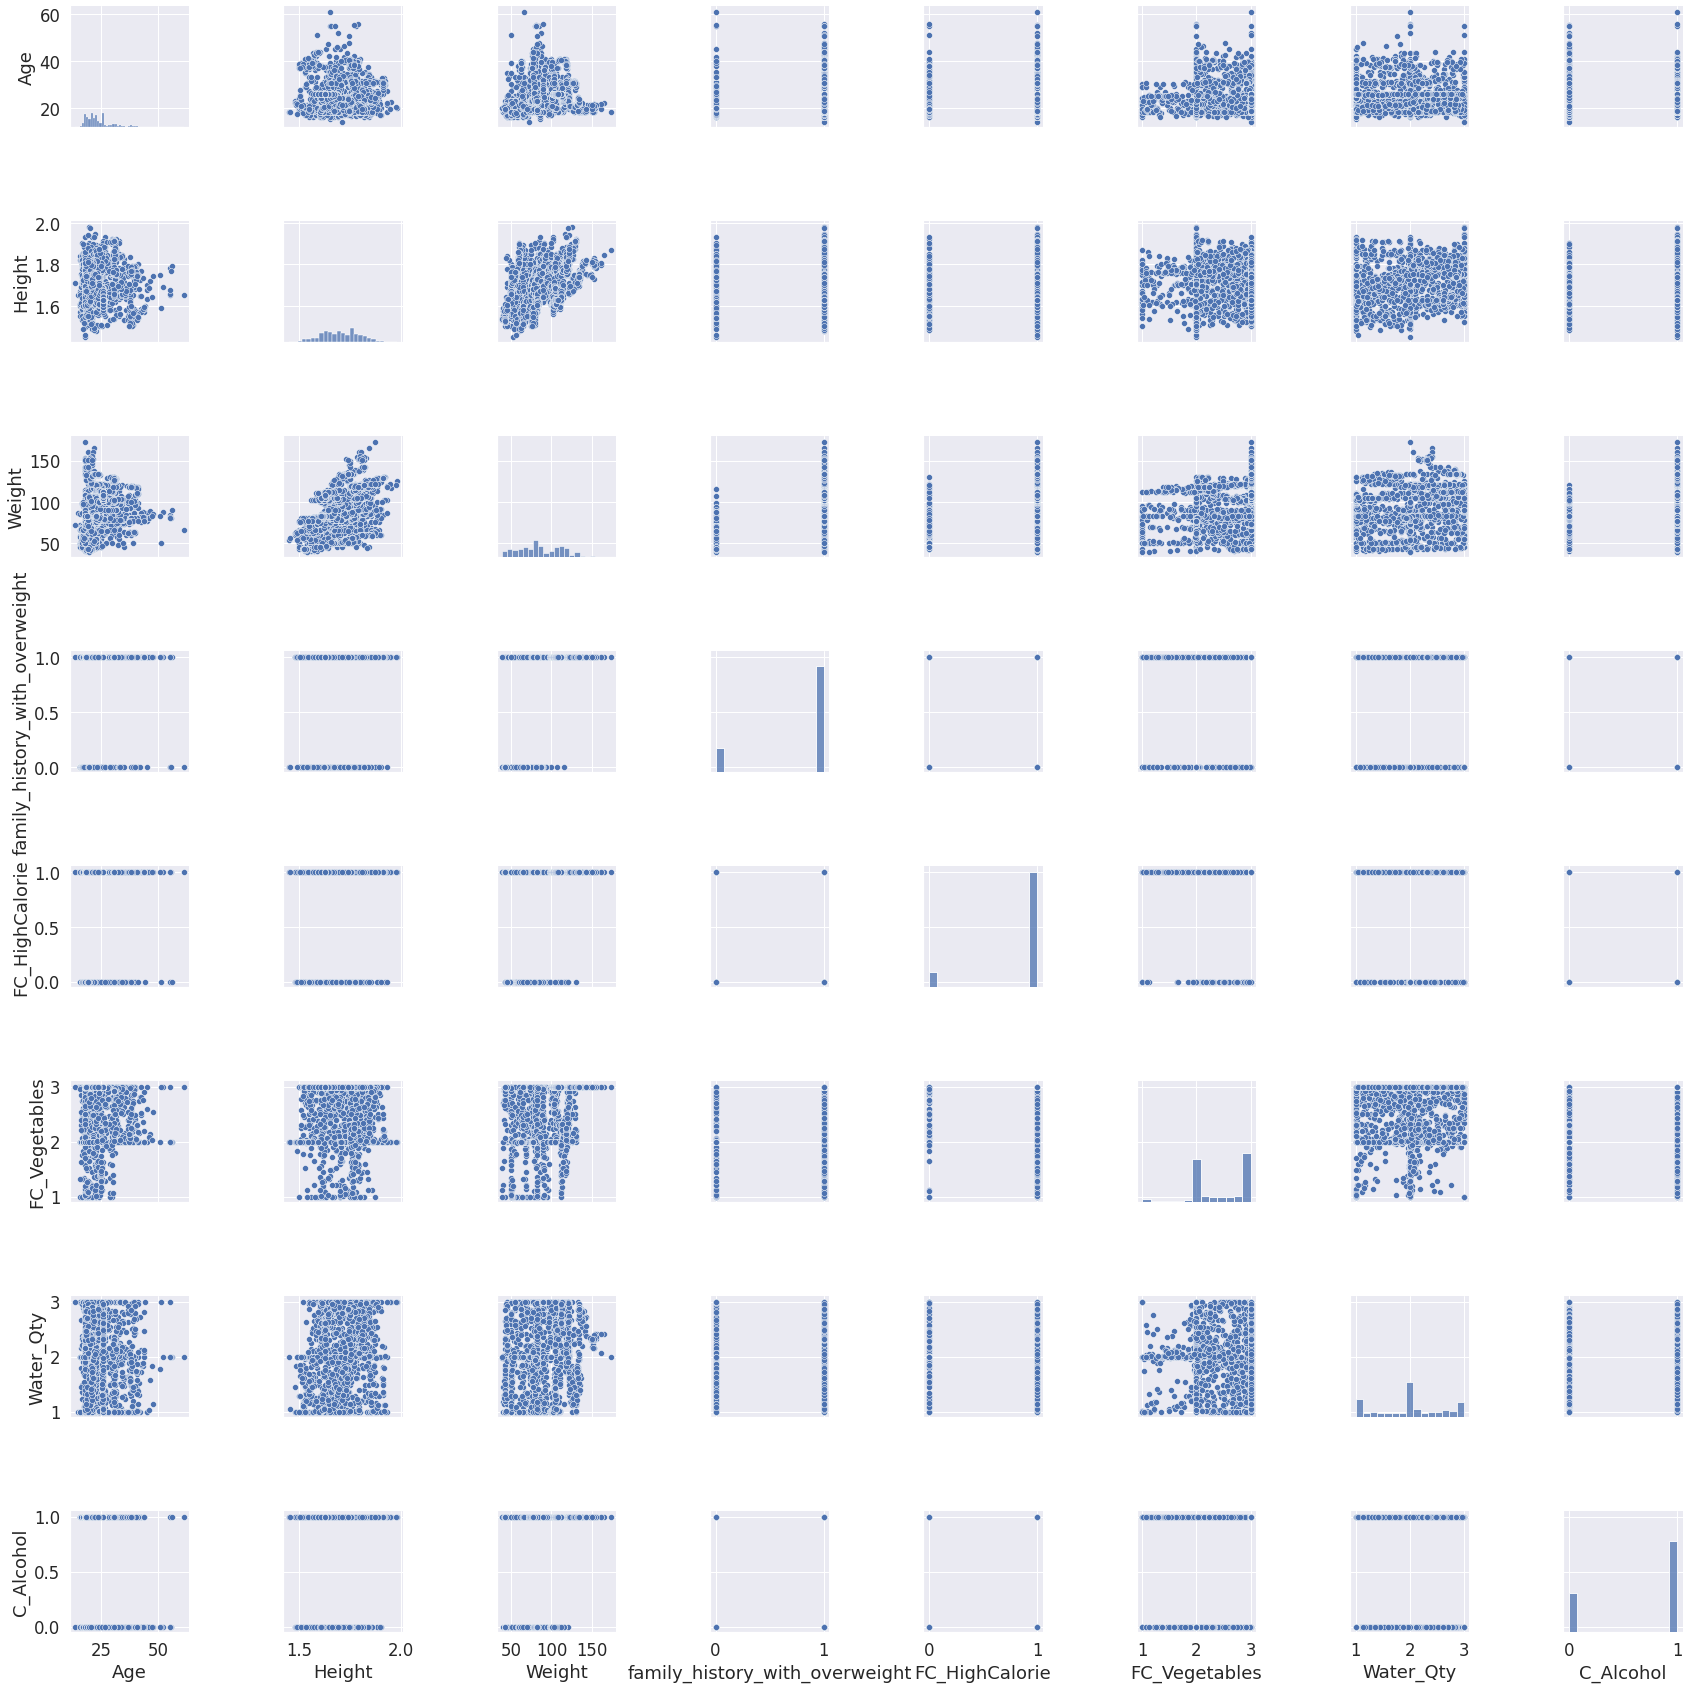

In [ ]:
#Using Pairplot
data2=data1.copy(deep=True)
data1=data1.drop(['Obese_level', 'Gender','N_Meals','Transport_mode','SMOKE', 'Physical_Activity', 'Gadgets_Usage' ,'Calorie_Calc'], axis=1)
sns.pairplot(data1,height=3)
plt.show()

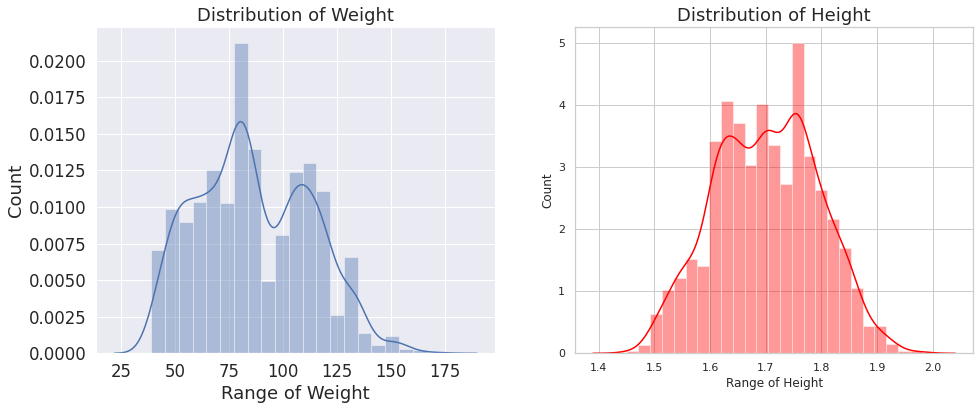

In [ ]:
plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data1['Weight'])
plt.title('Distribution of Weight', fontsize = 18)
plt.xlabel('Range of Weight')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data1['Height'], color = 'red')
plt.title('Distribution of Height', fontsize = 18)
plt.xlabel('Range of Score')
plt.ylabel('Count')
plt.show()

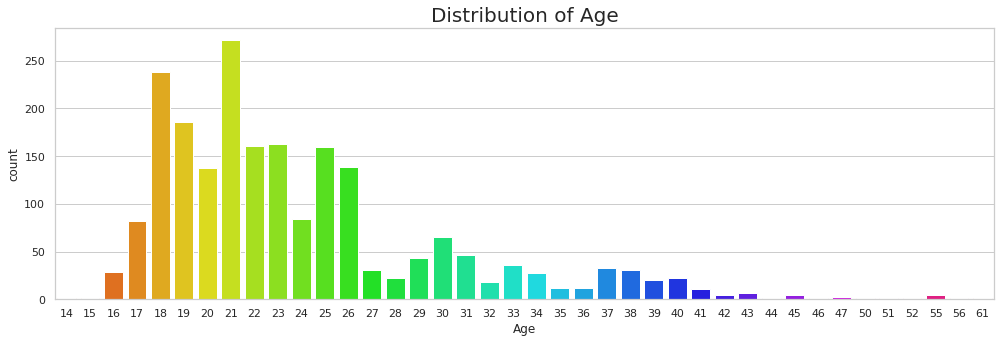

In [ ]:
#Showing Age distribution
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data1['Age'].astype(int), palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

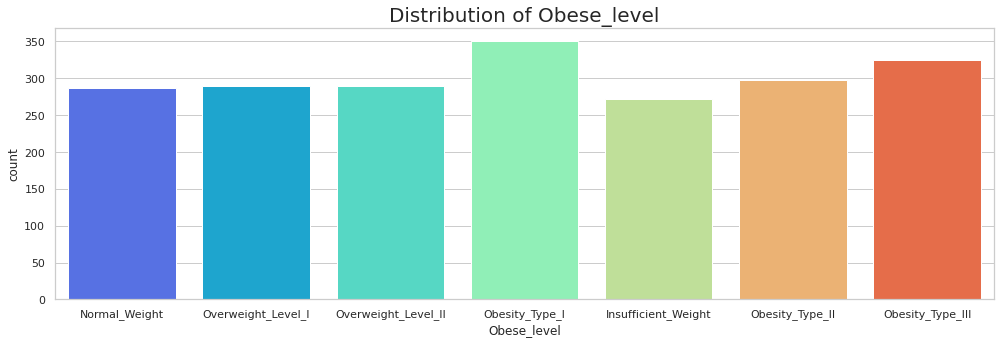

In [ ]:
#Showing Income distribution
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['Obese_level'], palette = 'rainbow')
plt.title('Distribution of Obese_level', fontsize = 20)
plt.show()

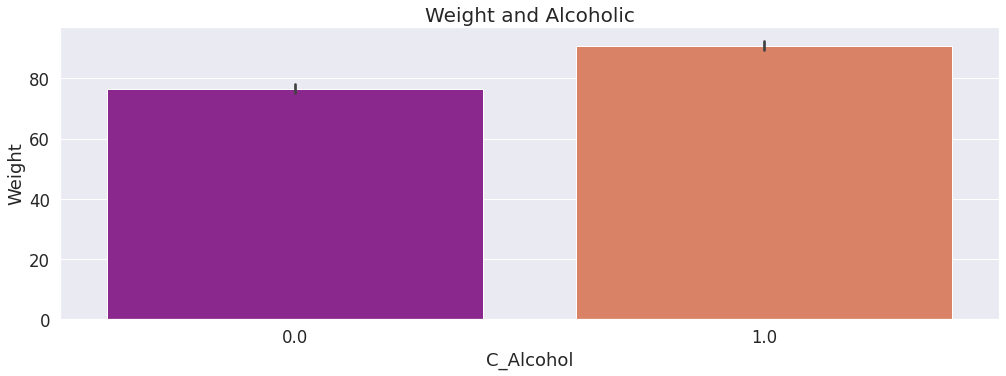

In [ ]:
#Shows Relationship of Alcoholic and Weight
sns.barplot(x =data1['C_Alcohol'], y =data1['Weight'], data = data1, 
            palette ='plasma')
plt.title('Weight and Alcoholic', fontsize = 20)
plt.show()


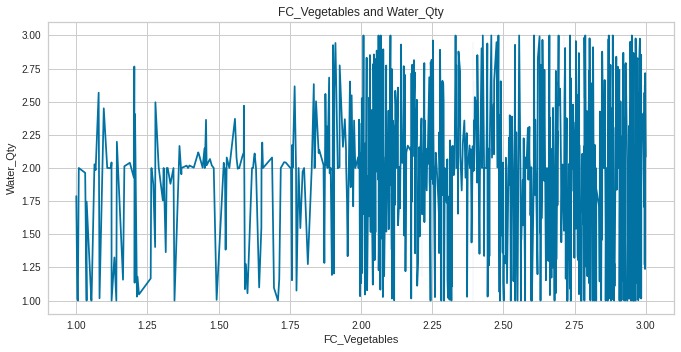

In [ ]:
#Shows Relationship of Water Consumption and Frequent Consumption of Vegetables

fig = plt.figure(figsize = (10, 5))
sns.lineplot(data=data1, x=data1['FC_Vegetables'], y=data1['Water_Qty'])
plt.title("FC_Vegetables and Water_Qty")
plt.show()

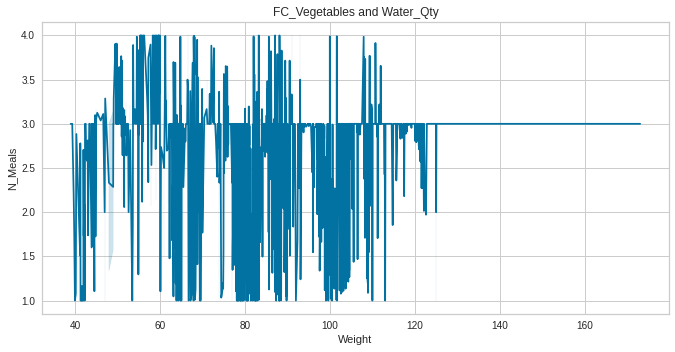

In [ ]:
#Shows Relationship of Frequent Meals and Weight

fig = plt.figure(figsize = (10, 5))
sns.lineplot(data=data, x=data['Weight'], y=data['N_Meals'])
plt.title("Frequent Meals and Weight")
plt.show()

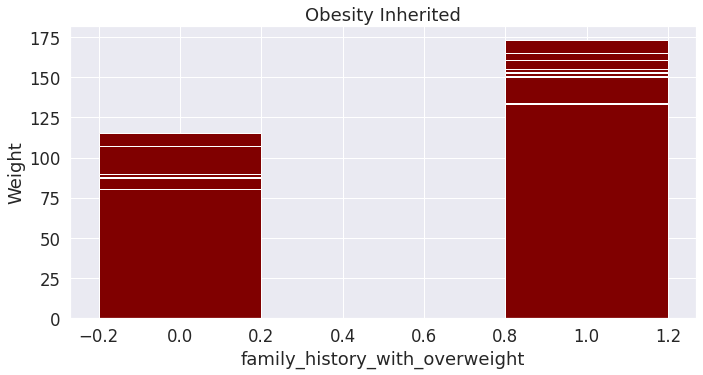

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar( data1['family_history_with_overweight'],data1['Weight'], color ='maroon',
        width = 0.4)
 
plt.xlabel("family_history_with_overweight")
plt.ylabel("Weight")
plt.title("Obesity Inherited")
plt.show()

# **Clustering Analysis**

## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

This is really fun. First, I found out Inertia and no. of Clusters then I added arrows by taking the exact value where I found a significant change in inertia.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0) [1536964.3907294555, 498068.9825324962, 277187.82104028965, 192149.05262697453, 154594.58268578586, 121765.30303506815, 95270.88355394591, 85160.83417380488, 76080.49941721457, 69060.14396220224]


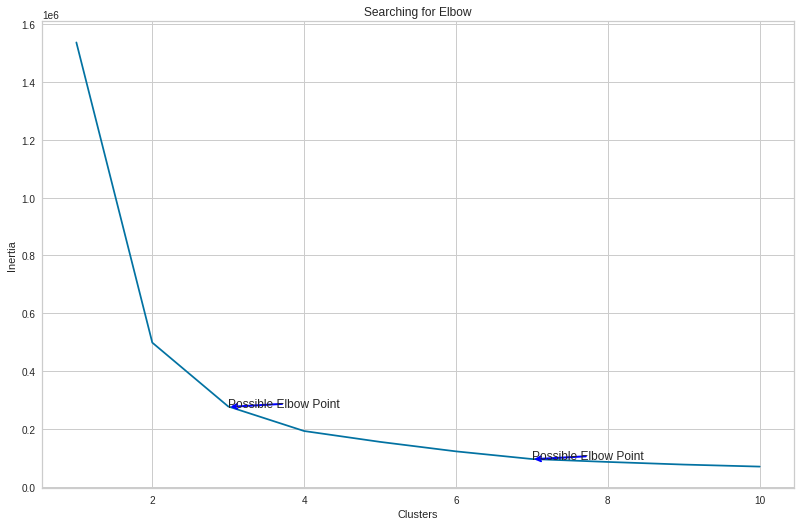

In [ ]:
from sklearn.cluster import KMeans

X = data1


clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
print(km,clusters)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# # # Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 275521.911), xytext=(3, 276000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(7, 94295.76291149801), xytext=(7, 94600), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


## **Silhouette Score**
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.

Silhouetter Score: 0.461


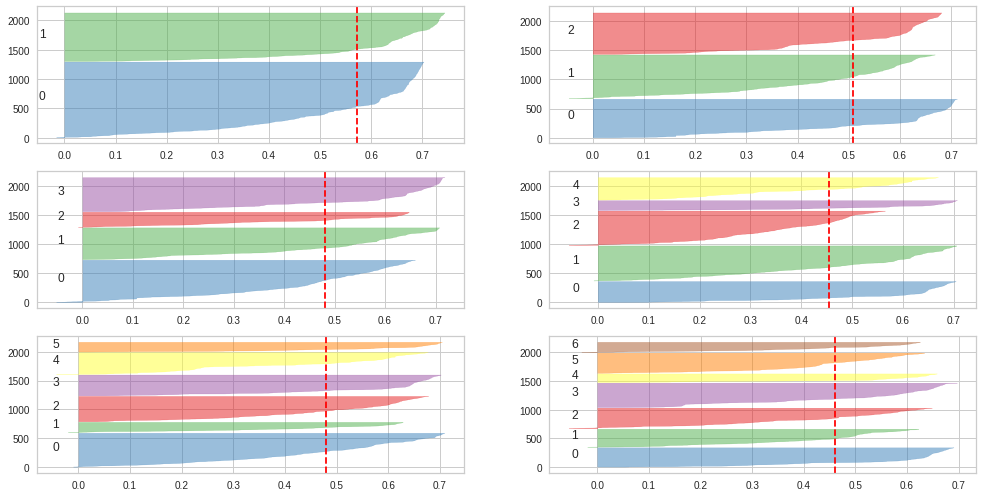

In [ ]:
from sklearn.metrics import silhouette_score as s
from yellowbrick.cluster import SilhouetteVisualizer

score = s(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)


> ### **Silhouette analysis**

The Silhouetter Score: 0.461 means that our clusters are almost dense and separated.

Interpretations from Plot no. 3 & 7:
* Presence of clusters above average score.
* Wide Fluctuations and thickness is almost similar representing each cluster is also a deciding point.

**Thus, this means that both 3 and 7 would be an optimal choice. However, to achieve more diversified outcome we keep n_cluster = 5**

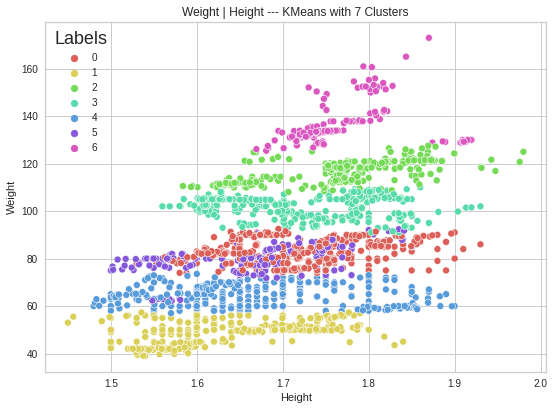

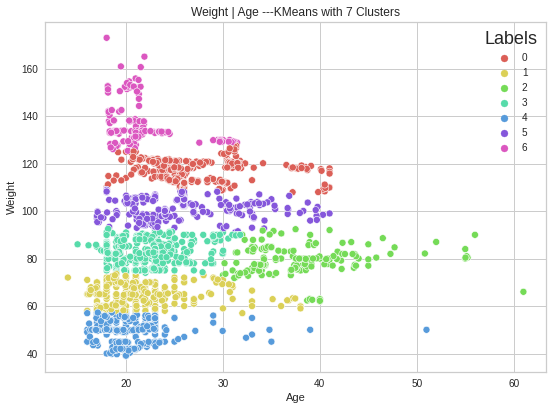

In [ ]:
km7= KMeans(n_clusters=7).fit(X)
X['Labels'] = km7.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot( X['Height'],X['Weight'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 7))
plt.title('Weight | Height --- KMeans with 7 Clusters')

ax = fig.add_subplot(121)
km7= KMeans(n_clusters=7).fit(X)
X['Labels'] = km7.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Age'], X['Weight'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 7))
plt.title('Weight | Age ---KMeans with 7 Clusters')
plt.show()

## **Agglomerative Hierarchical Clustering**
The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
linkage: The algorithm will merge the pairs of cluster that minimize this criterion.


1.   ‘ward’ minimizes the variance of the clusters being merged.

2.   ‘average’ uses the average of the distances of each observation of the two sets.
3.   ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
4.   ‘single’ uses the minimum of the distances between all observations of the two sets.

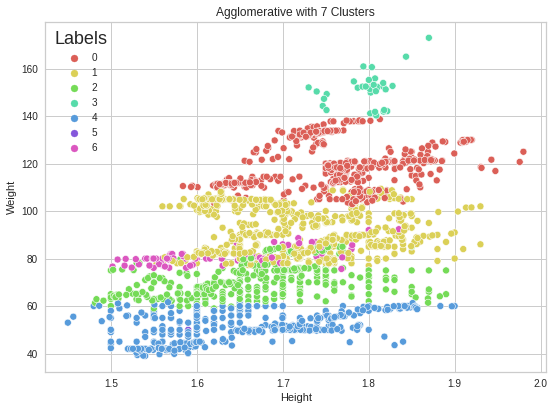

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=7, linkage='complete').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Height'],X['Weight'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 7))
plt.title('Agglomerative with 7 Clusters')
plt.show()

Showing 0s in diagonal
 [[ 0.          8.42674314 13.2299811  ... 69.75635371 69.48381093
  69.57951062]
 [ 8.42674314  0.         21.35599213 ... 77.81970554 77.52983587
  77.62845674]
 [13.2299811  21.35599213  0.         ... 56.71784898 56.39617868
  56.50973735]
 ...
 [69.75635371 77.81970554 56.71784898 ...  0.          2.03286177
   1.41537139]
 [69.48381093 77.52983587 56.39617868 ...  2.03286177  0.
   0.70860901]
 [69.57951062 77.62845674 56.50973735 ...  1.41537139  0.70860901
   0.        ]]


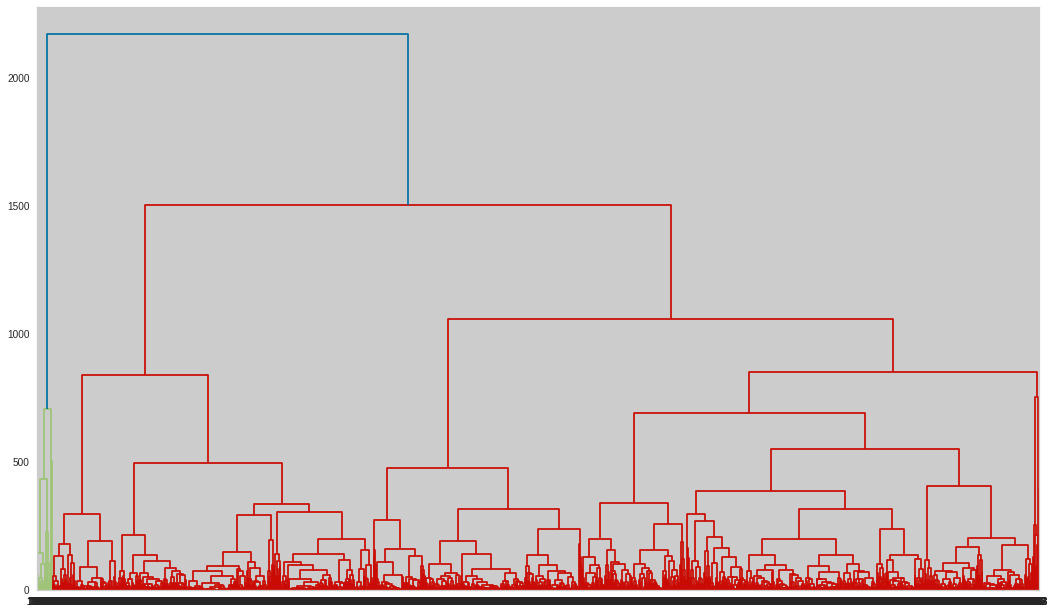

In [ ]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print("Showing 0s in diagonal\n",dist)
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(16, 10))

#Showing only top 4 levels
dendro = hierarchy.dendrogram(Z, truncate_mode='level',leaf_rotation=0, leaf_font_size=10, orientation='top')

## **Density Based Clustering (DBSCAN)**
Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.
It works based on two parameters: Epsilon and Minimum Points
1.  Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
2.  minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)


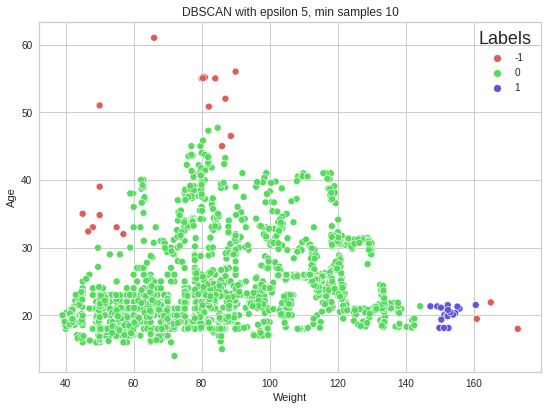

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=5, min_samples=10).fit(X)
print(db)
X['Labels'] = db.labels_
# print(db.labels_)
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Weight'], X['Age'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 5, min samples 10')
plt.show()

## **Mean Shift Algorithm**
It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

* The algorithm automatically sets the number of clusters
* H*owever, the algo estimates the bandwidth but quantile variable has an effect on setting the bandwidth manually. I have tested using multiple inputs for quantile and found that 0.18 is the most suitable.*



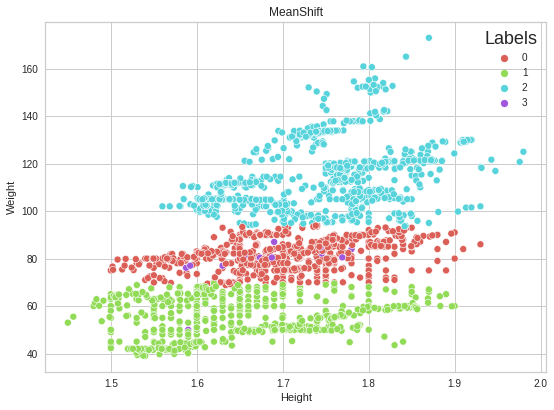

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.22)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Height'],X['Weight'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

# **Conclusion**


> In this notebook, with Obesity dataset, there was only 3 columns with numeric values while rest of the features were categorical.

Instead of going towards one-hot encoding which could lead towards so many columns, I chose to replace the categorical values with binary numeric.

> I have performed EDA in depth so that I would be able to figure out the relationships of each features over another.
 
* The Correlation Heatmap and pairplots gives a lot of information about the correlation among the features.
Through which I plot different graphs to understand the relationship of two features.
* Gender count: It shows that our dataset is not biased with gender and it has negligible impact on obesity as well.

* Overall through EDA, I found that people who are obese are Alcoholic and their average number of meals each day is higher. Also, they eat food which is high in calories.
* Most important aspect is family history, that is either genetics or eating habits can be a cause i.e. if people in your family are obese, you have higher chances to become like them.


## **Clustering Results:**

So far I have implemented 4 most popular clustering algorithms: Kmeans, Aggleromative, DBScan and Mean Shift.

### Elbow Method: 
> Using elbow method, I found that dataset can be divided into 2,3,4 and 7 clusters.
However, with the help of silhouette score and graphical representation, it was evident that 3 or 7 would be an optimal choice.

### Kmeans: 
> Seven Clusters are formed in two ways: a) Weight and Height b) Weight and Age

It is to show that people at young age are more prone to Obesity.

Here, I divide people in 7 categories:

* Label 0: Young person with Tall Height and Increased Weight – Overweight
* Label 1: Young person with Average Height and Low Weight – Weak
* Label 2: Older person with Average to Tall Height and greater weight – Obese
* Label 3: Average Age person with Tall Height and Increased Weight – Borderline Obese
* Label 4: Young to Old person with Average Height and Average Weight – Normal
* Label 5: Young to Middle Age person with Below Average Height and Average Weight – Borderline Overweight
* Label 6: Young person with Average to Tall Height and Higher Weight – Very Obese

### Aggleromative Clustering:
> In both Kmeans and Aggleromative Clustering, Clusters are dense and sparse at some points which makes it difficult to say which one is doing better job.
**However, in my opinion, Aggleromative Clustering has done the best job here so far by dividing the clusters on the basis of their dissimilarity.**

### DBScan:
> In DBScan, we can see one huge cluster carries low to average weight densely and one small cluster with carrying higher weight along with few outliers.
DBScan did not do a good to make clusters.

### MeanShift:
> In MeanShift Clustering, it has generated 4 clusters automatically. In which, 3 clusters are categorizing the weight feature and one clusters shows different behavior spread over another cluster demonstrating that some anomalies or outliers are present.


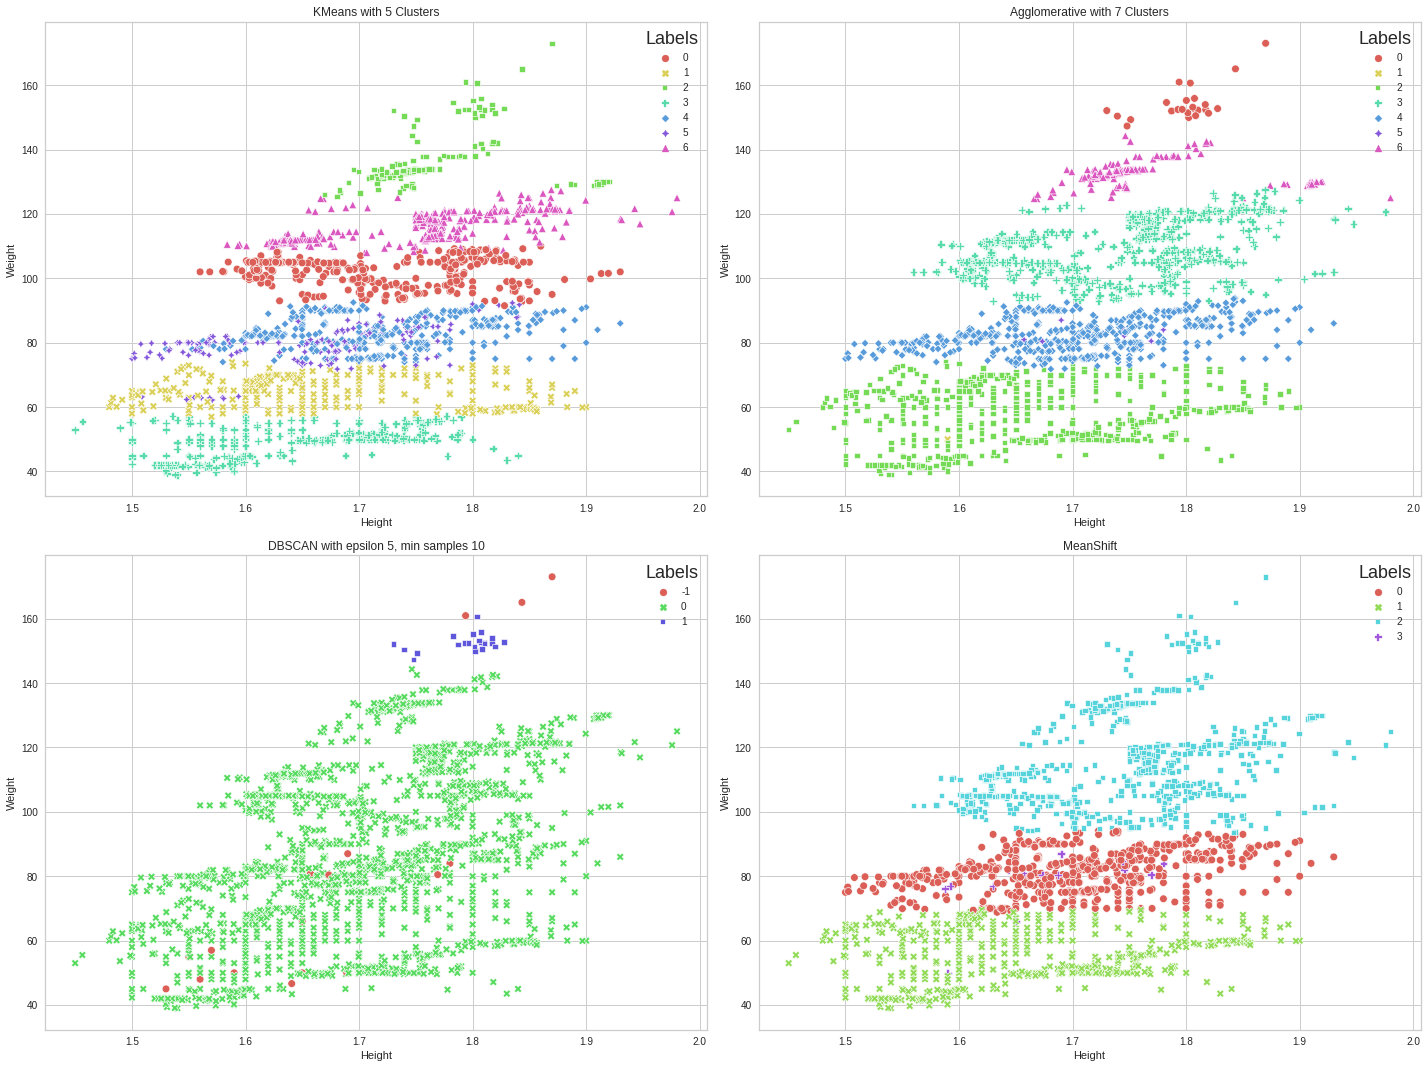

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km7 = KMeans(n_clusters=7).fit(X)
X['Labels'] = km7.labels_
sns.scatterplot(X['Height'],X['Weight'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 7), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=7, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Height'],X['Weight'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 7), s=60, ax=ax)
ax.set_title('Agglomerative with 7 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=5, min_samples=10).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['Height'],X['Weight'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 5, min samples 10')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.22)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Height'],X['Weight'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()